In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/Users/harsha/Documents/PCL/Code/Production/crop_yield.csv')
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [2]:
df.shape

(19689, 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [4]:
from sklearn.preprocessing import LabelEncoder

crop_encoder = LabelEncoder()
state_encoder = LabelEncoder()
season_encoder = LabelEncoder()

df['Crop'] = crop_encoder.fit_transform(df['Crop'])
df['State'] = state_encoder.fit_transform(df['State'])
df['Season'] = season_encoder.fit_transform(df['Season'])

crop_mapping = dict(zip(crop_encoder.classes_, crop_encoder.transform(crop_encoder.classes_)))
state_mapping = dict(zip(state_encoder.classes_, state_encoder.transform(state_encoder.classes_)))
season_mapping = dict(zip(season_encoder.classes_, season_encoder.transform(season_encoder.classes_)))

In [5]:
# Print the mappings
print("Crop mapping:")
print(crop_mapping)
print("\nState mapping:")
print(state_mapping)
print("\nSeason mapping:")
print(season_mapping)

Crop mapping:
{'Arecanut': 0, 'Arhar/Tur': 1, 'Bajra': 2, 'Banana': 3, 'Barley': 4, 'Black pepper': 5, 'Cardamom': 6, 'Cashewnut': 7, 'Castor seed': 8, 'Coconut ': 9, 'Coriander': 10, 'Cotton(lint)': 11, 'Cowpea(Lobia)': 12, 'Dry chillies': 13, 'Garlic': 14, 'Ginger': 15, 'Gram': 16, 'Groundnut': 17, 'Guar seed': 18, 'Horse-gram': 19, 'Jowar': 20, 'Jute': 21, 'Khesari': 22, 'Linseed': 23, 'Maize': 24, 'Masoor': 25, 'Mesta': 26, 'Moong(Green Gram)': 27, 'Moth': 28, 'Niger seed': 29, 'Oilseeds total': 30, 'Onion': 31, 'Other  Rabi pulses': 32, 'Other Cereals': 33, 'Other Kharif pulses': 34, 'Other Summer Pulses': 35, 'Peas & beans (Pulses)': 36, 'Potato': 37, 'Ragi': 38, 'Rapeseed &Mustard': 39, 'Rice': 40, 'Safflower': 41, 'Sannhamp': 42, 'Sesamum': 43, 'Small millets': 44, 'Soyabean': 45, 'Sugarcane': 46, 'Sunflower': 47, 'Sweet potato': 48, 'Tapioca': 49, 'Tobacco': 50, 'Turmeric': 51, 'Urad': 52, 'Wheat': 53, 'other oilseeds': 54}

State mapping:
{'Andhra Pradesh': 0, 'Arunachal Prad

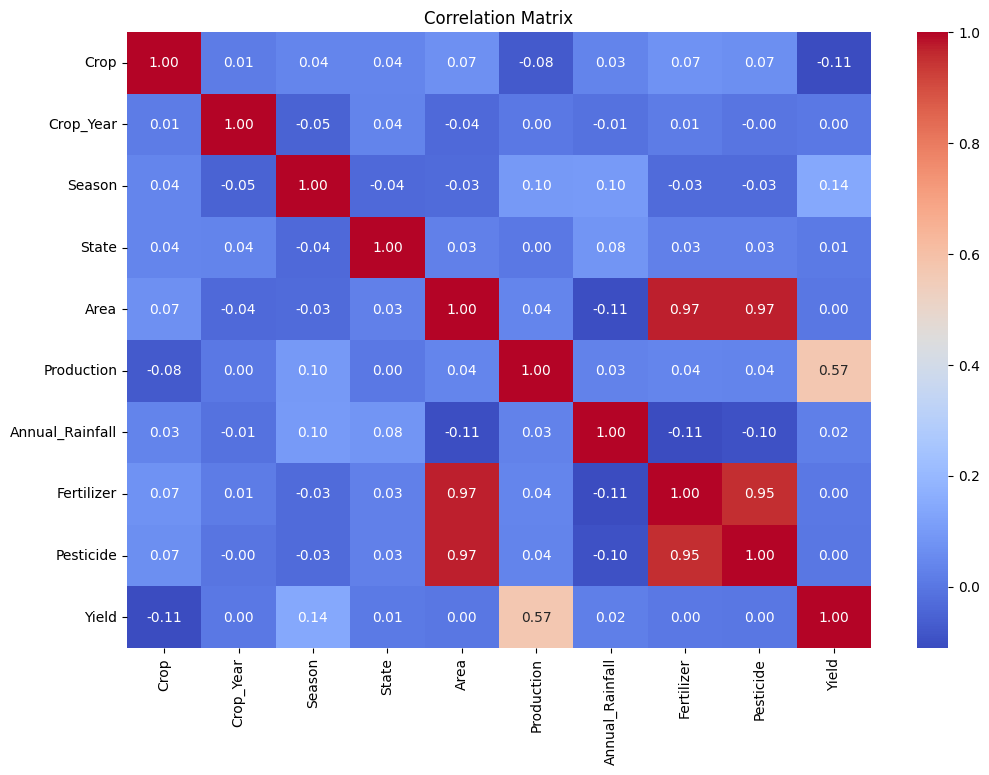

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [7]:
df = df.drop(columns=["Crop_Year","Yield","State"])

In [8]:
from sklearn.model_selection import train_test_split

x = df.drop(['Production'], axis=1)
y = df['Production']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    "SVR": Pipeline([('scaler', StandardScaler()), ('svr', SVR(C=1.0, epsilon=0.2))]),
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

In [10]:
from sklearn.metrics import mean_absolute_error

results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    mae = mean_absolute_error(y_test, predictions)
    results[name] = mae

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])
nn_model.compile(optimizer='adam', loss='mean_absolute_error')

In [12]:
nn_model.fit(x_train, y_train, epochs=1, batch_size=32, verbose=0)
nn_predictions = nn_model.predict(x_test)
nn_mae = mean_absolute_error(y_test, nn_predictions)
results['Neural Network'] = nn_mae

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step


In [13]:
for name, mae in results.items():
    print(f"Model: {name}")
    print(f"Mean Absolute Error: {mae:.2f}\n")

Model: Linear Regression
Mean Absolute Error: 44962026.86

Model: Random Forest
Mean Absolute Error: 2552887.51

Model: XGBoost
Mean Absolute Error: 2936489.52

Model: SVR
Mean Absolute Error: 16690481.20

Model: Gaussian Naive Bayes
Mean Absolute Error: 17939630.42

Model: Decision Tree
Mean Absolute Error: 2790668.94

Model: Neural Network
Mean Absolute Error: 16696531.70



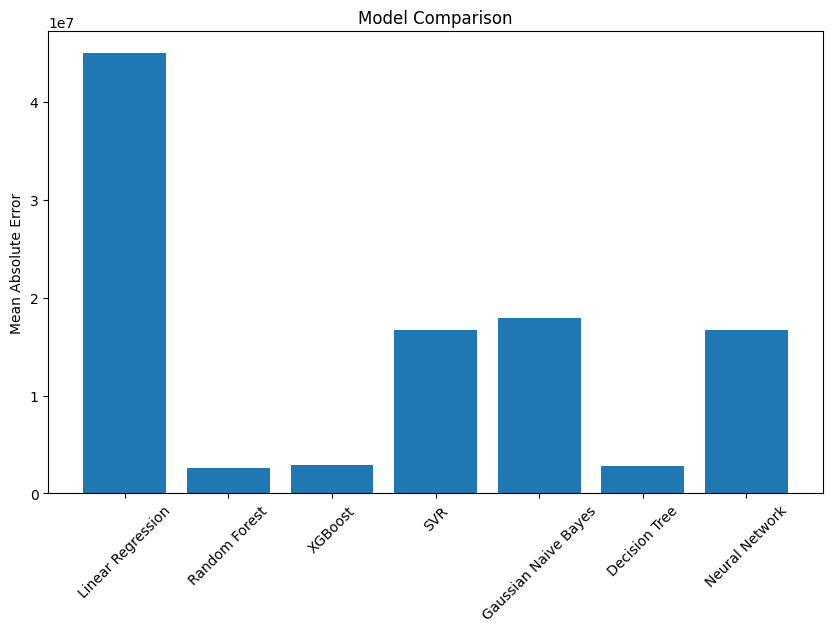

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(results)), list(results.values()), align='center')
plt.xticks(range(len(results)), list(results.keys()), rotation=45)
plt.ylabel('Mean Absolute Error')
plt.title('Model Comparison')
plt.show()

In [15]:
model = models["Random Forest"]

df_new = [[21,1,94520,2051.4,8995468.4,29301.2]]
predictions = model.predict(df_new)
print(predictions)

[788030.5]


In [16]:
df.head()

,Crop,Season,Area,Production,Annual_Rainfall,Fertilizer,Pesticide
0,0,4,73814.0,56708,2051.4,7024878.38,22882.34
1,1,1,6637.0,4685,2051.4,631643.29,2057.47
2,8,1,796.0,22,2051.4,75755.32,246.76
3,9,4,19656.0,126905000,2051.4,1870661.52,6093.36
4,11,1,1739.0,794,2051.4,165500.63,539.09


In [17]:
yield_ = predictions[0]/94520

In [18]:
print(yield_)

8.337182606855691


In [19]:
predictions[0]

788030.5

In [20]:
import os
import pickle

with open('/Users/harsha/Documents/PCL/Code/Website/random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)